# 模倣学習

**参考**

* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)
* [FLAMBE: Structural Complexity and Representation Learning of Low Rank MDPs](https://arxiv.org/abs/2006.10814)
* [Introduction to Nonparametric Estimation](https://link.springer.com/book/10.1007/b13794)

今回は模倣学習の理論を見ていきます。

**表記**

MDPを次で定義します。

1. 有限状態集合: $S=\{1, \dots, |S|\}$
2. 有限行動集合: $A=\{1, \dots, |A|\}$
3. 遷移確率行列: $P\in \mathbb{R}^{SA\times S}$
4. 報酬行列: $r\in \mathbb{R}^{S\times A}$
5. 割引率: $\gamma \in [0, 1)$
6. 初期状態: $\mu \in \mathbb{R}^{S}$

その他

* $\pi^{\star}: \mathcal{S} \mapsto \Delta(\mathcal{A})$：報酬関数で学習されたエキスパート方策
* $\widehat{\pi}: \mathcal{S} \mapsto \Delta(\mathcal{A})$：学習させる方策
* $V^{\widehat{\pi}}$を$V^\star$に近づけるのが目的
* $d^\pi$：方策$\pi$のもとでの状態と行動の訪問分布
* $D^\star=\left\{s_i^{\star}, a_i^{\star}\right\}_{i=1}^M$：$s_i^{\star}, a_i^{\star} \sim d^{\pi^{\star}}$
* $\Pi=\{\pi: \mathcal{S} \mapsto \Delta(A)\}$：方策の集合

## Behavior Cloning

基本のBehavior Cloning (BC) のサンプル効率を導出していきます。まずは$\pi^\star \in \Pi$を仮定して考えていきます。

BCでは$D^\star$以外の情報を使いません。このとき、BCでは次の最尤推定（Maximum Likelihood Estimation）で方策を学習します。

$$
\text { Behavior Cloning (BC): } \quad \widehat{\pi}=\operatorname{argmax}_{\pi \in \Pi} \sum_{i=1}^M \log \pi\left(a_i^{\star} \mid s_i^{\star}\right) \text {. }
$$

---

**最尤推定のサンプル効率(TODO)**

確率$1-\delta$以上で次の式が成立する。

$$
\mathbb{E}_{s \sim d^{\pi^{\star}}}\left\|\widehat{\pi}(\cdot \mid s)-\pi^{\star}(\cdot \mid s)\right\|_{T V}^2 \leq \frac{2 \log (|\Pi| / \delta)}{M}
$$

---
コメント

証明は[FLAMBE: Structural Complexity and Representation Learning of Low Rank MDPs](https://arxiv.org/abs/2006.10814)のTheorem 21が参考になるみたいですが、最後のところが証明が間違ってる気がしますね... 
[Empirical Processes in M-Estimation](https://www.amazon.co.jp/-/en/Sara-van-Geer/dp/0521123259)の７章に似た話が載ってるらしいので、それを見たほうがいいかもしれません。
ただし[簡易版](https://stat.ethz.ch/~geer/cowlas.pdf)の７章にあるように、求める上界自体はおおむね正しそうです。

---

証明していきましょう。

**ステップ１**

少し表記を追加します：
* $D$と独立なデータセット：${D}^\prime=\left\{s_i^{\star}, a_i^{\star}\right\}_{i=1}^M$：$s_i^{\star}, a_i^{\star} \sim d^{\pi^{\star}}$。（元論文では条件付き独立なやつを使っています）
* 誤差関数：$l(\pi, (x, y))$
* 誤差関数の和：$L(\pi, D)=\sum_{i=1}^M \ell\left(\pi,\left(x_i, y_i\right)\right)$

このとき、

$$
\mathbb{E}_{D\sim d^{\pi^\star}}\left[\exp \left(L(\hat{\pi}_D, D)-\log \mathbb{E}_{D^{\prime}\sim d^{\pi^\star}} \exp \left(L\left(\hat{\pi}_D, D^{\prime}\right)\right)-\log |\mathcal{\Pi}|\right)\right]\leq1.
$$

を証明します。

$\Pi$上の一様分布を$f$とします。また、$g:\Pi \to \mathbb{R}$を任意の関数として、$\eta(\pi):=\frac{\exp(g(\pi))}{\sum_\pi \exp(g(\pi))}$とします。$g$によって割り当てられた$\Pi$上の方策の分布です。

このとき、任意の$\Pi$上の分布$\hat{f}$について、

$$
\begin{aligned}
0 & \leq \mathrm{KL}(\hat{f} \| \eta)= \sum_\pi \hat{f}(\pi) \log (\hat{f}(\pi))-\sum_\pi \hat{f}(\pi) \log (\eta(\pi)) \\
& =\sum_\pi \hat{f}(\pi) \log (\hat{f}(\pi))+\sum_\pi \hat{f}(\pi) \log \left(\sum_{\pi^{\prime}} \exp \left(g\left(\pi^{\prime}\right)\right)\right)-\sum_\pi \hat{f}(\pi) g(\pi) \\
& =\mathrm{KL}(\hat{f} \| f)-\sum_\pi \hat{f}(\pi) g(\pi)+\log \mathbb{E}_{\pi \sim f} \exp (g(\pi)) \\
& \leq \log |\mathcal{\Pi}|-\sum_\pi \hat{f}(\pi) g(\pi)+\log \mathbb{E}_{\pi \sim f} \exp (g(\pi)) .
\end{aligned}
$$

ここで、$f$は一様分布なので$f(\pi) = \frac{1}{|\Pi|}$であり、$\mathrm{KL}(\hat{f} \| f)= \sum_\pi \hat{f}(\pi) \log (\hat{f}(\pi))+\log |\Pi| \leq \log |\Pi|$を使いました。

並び替えると、
$$
\sum_\pi \hat{f}(\pi) g(\pi)-\log |\Pi| \leq \log \mathbb{E}_{\pi \sim f} \exp (g(\pi))
$$

が成り立ちます。

<!-- ここで、$\hat{\pi}_D$を$D$を使って模倣した方策とします。 -->
また、$\hat{f}=\mathbf{1}\{\hat{\pi}_D\}$、$g(\pi)=L(\pi, D)-\log \mathbb{E}_{D^\prime\sim d^{\pi^\star}} \exp (L\left(\pi, D^\prime\right))$とします。
このとき、任意の$D$について、

$$
L(\hat{\pi}_D, D)-\log \mathbb{E}_{D^\prime \sim d^{\pi^\star}} \exp \left(L\left(\hat{\pi}_D, D^\prime\right)\right)-\log |\mathcal{\Pi}| \leq \log \mathbb{E}_{\pi \sim f} \frac{\exp (L(\pi, D))}{\mathbb{E}_{D^\prime \sim d^{\pi^\star}} \exp \left(L\left(\pi, D^{\prime}\right)\right)}
$$

が成立し、変形すると

$$
\mathbb{E}_{D\sim d^{\pi^\star}}\left[\exp \left(L(\hat{\pi}_D, D)-\log \mathbb{E}_{D^{\prime}\sim d^{\pi^\star}} \exp \left(L\left(\hat{\pi}_D, D^{\prime}\right)\right)-\log |\mathcal{\Pi}|\right)\right]
\leq \mathbb{E}_{\pi \sim f} \mathbb{E}_{D\sim d^{\pi^\star}} \frac{\exp (L(\pi, D))}{\mathbb{E}_{D^{\prime}\sim d^{\pi^\star}}\left[\exp \left(L\left(\pi, D^{\prime}\right)\right) \mid D\right]}=1 .
$$

最後の等式は$D$と$D^\prime$が独立なため成立します。
よって、

$$
\mathbb{E}_{D\sim d^{\pi^\star}}\left[\exp \left(L(\hat{\pi}_D, D)-\log \mathbb{E}_{D^{\prime}\sim d^{\pi^\star}} \exp \left(L\left(\hat{\pi}_D, D^{\prime}\right)\right)-\log |\mathcal{\Pi}|\right)\right]\leq1.
$$

**ステップ２**

$$
\mathbb{E}_{s \sim d^{\pi^\star}}\left\|\pi_1(s, \cdot)-\pi_2(s, \cdot)\right\|_{\mathrm{TV}}^2 \leq-2 \log \mathbb{E}_{s \sim d^{\pi^\star}, y \sim \pi_2(\cdot \mid s)} \exp \left(-\frac{1}{2} \log \left(\pi_2(s, y) / \pi_1(s, y)\right)\right)
$$

を証明します。まず、全変動距離を次のHellinger距離で抑えます。

$$
\mathrm{H}^2(q \| p):=\int_{\mathcal{Z}}(\sqrt{p(z)}-\sqrt{q(z)})^2 d z .
$$

[Introduction to Nonparametric Estimation](https://link.springer.com/book/10.1007/b13794)などを使えば、

$$
\|p(\cdot)-q(\cdot)\|_{\mathrm{TV}}^2 \leq \mathrm{H}^2(q \| p) \cdot\left(1-\frac{\mathrm{H}^2(q \| p)}{4}\right) \leq \mathrm{H}^2(q \| p)
$$

が成立します。また、

$$
\begin{aligned}
\mathrm{H}^2(q \| p) & =\int p(z)+q(z)-2 \sqrt{p(z) q(z)} d z=2 \cdot \mathbb{E}_{z \sim q}[1-\sqrt{p(z) / q(z)}] \\
& \leq-2 \log \mathbb{E}_{z \sim q} \sqrt{p(z) / q(z)}=-2 \log \mathbb{E}_{z \sim q} \exp \left(-\frac{1}{2} \log (q(z) / p(z))\right) .
\end{aligned}
$$

が$(1-x)\leq -\log(x)$を使うと成立します。
これに当てはめれば、
$$
\mathbb{E}_{s \sim d^{\pi^\star}}\left\|\pi_1(s, \cdot)-\pi_2(s, \cdot)\right\|_{\mathrm{TV}}^2 \leq-2 \mathbb{E}_{s \sim d^{\pi^\star}}\log \mathbb{E}_{y \sim \pi_2(\cdot \mid s)} \exp \left(-\frac{1}{2} \log \left(\pi_2(s, y) / \pi_1(s, y)\right)\right)
$$


が成立します。

**ステップ３**

確率$1-\delta$以上で次の式が成立するのを証明します。

$$
\mathbb{E}_{s \sim d^{\pi^{\star}}}\left\|\widehat{\pi}(\cdot \mid s)-\pi^{\star}(\cdot \mid s)\right\|_{T V}^2 \leq \frac{2 \log (|\Pi| / \delta)}{M}
$$

まず、Cramer-Chernoff methodを使って集中不等式を出します。
固定された$\hat{\pi}_D$について、

$$
P(L\left(\hat{\pi}_D, D\right) \geq \varepsilon) = 
P(\exp(L\left(\hat{\pi}_D, D\right)) \geq \exp(\varepsilon)) 
\leq \mathbb{E}_{D^\prime \sim d^{\pi^\star}}[\exp(L\left(\hat{\pi}_D, D^\prime\right))]\exp(-\varepsilon)
$$

が成り立ちます（最後のはマルコフの不等式です）。
$\mathbb{E}_{D^\prime \sim d^{\pi^\star}}[\exp(L\left(\hat{\pi}_D, D^\prime\right))]\exp(-\varepsilon) = \delta$を解けば、
確率$\delta$以下で

$$L\left(\hat{\pi}_D, D\right) \geq \log \mathbb{E}_{D^\prime \sim d^{\pi^\star}}[\exp(L\left(\hat{\pi}_D, D^\prime\right))] - \log \delta $$

$\hat{\pi}_D$を$\Pi$についてUnion Boundを取れば、任意の$\hat{\pi}_D$について、確率$1-\delta$以上で

$$-\log \mathbb{E}_{D^\prime \sim d^{\pi^\star}}[\exp(L\left(\hat{\pi}_D, D^\prime\right))] \leq -L\left(\hat{\pi}_D, D\right) + \log |\Pi| + \log (1/\delta) $$

最後に
$
L(\pi, D) = -\frac{1}{2}\sum_{i=1}^M \log \frac{\pi^\star\left(a_i^{\star} \mid s_i^{\star}\right)}{\pi\left(a_i^{\star} \mid s_i^{\star}\right)}
$
とします。このとき、上の不等式の右辺は

$$
\begin{aligned}
-L\left(\hat{\pi}_D, D\right) + \log |\Pi| + \log (1/\delta)
&=-\frac{1}{2}\sum_{i=1}^M \log \frac{\pi^\star\left(a_i^{\star} \mid s_i^{\star}\right)}{\hat{\pi}_D\left(a_i^{\star} \mid s_i^{\star}\right)} + \log |\Pi| + \log (1/\delta)\\
&=-\frac{1}{2}\sum_{i=1}^M \log \pi^\star\left(a_i^{\star} \mid s_i^{\star}\right) + \frac{1}{2}\sum_{i=1}^M \log {\hat{\pi}_D\left(a_i^{\star} \mid s_i^{\star}\right)} + \log |\Pi| + \log (1/\delta)\\
&\leq \log |\Pi| + \log (1/\delta)
\end{aligned}
$$

が成立します。最後の不等式は$\hat{\pi}_D$が$D$上の最尤推定なせいです。
一方で、左辺は

$$
\begin{aligned}
-\log \mathbb{E}_{D^\prime \sim d^{\pi^\star}}[\exp(L\left(\hat{\pi}_D, D^\prime\right))] &= 
-\log \mathbb{E}_{D^\prime \sim d^{\pi^\star}}\left[\exp\left(-\frac{1}{2}\sum_{i=1}^M \log \frac{\pi^\star\left(a_i^{\star} \mid s_i^{\star}\right)}{\hat{\pi}_D\left(a_i^{\star} \mid s_i^{\star}\right)}\right)\right] \\
&\geq M\frac{1}{2}\mathbb{E}_{s \sim d^{\pi^\star}}\left\|\pi_1(s, \cdot)-\pi_2(s, \cdot)\right\|_{\mathrm{TV}}^2 
\end{aligned}
$$

TODO: ここの変形ができなかったのでギブアップです... 正しいやり方を見つけたら追記します。

---

最尤推定のサンプル効率を使えば、BCのサンプル効率が出せます。

**BCのサンプル効率**

確率$1-\delta$以上で、BCは次を満たす方策$\hat{\pi}$を返します：

$$V^{\star}-V^{\widehat{\pi}} \leq \frac{3}{(1-\gamma)^2} \sqrt{\frac{\ln (|\Pi| / \delta)}{M}}$$

証明は簡単です：

$$
\begin{aligned}
& (1-\gamma)\left(V^{\star}-V^{\widehat{\pi}}\right)=\mathbb{E}_{s \sim d^{\pi^{\star}}} \mathbb{E}_{a \sim \pi^{\star}(\cdot \mid s)} A^{\widehat{\pi}}(s, a) \\
& =\mathbb{E}_{s \sim d^{\pi^{\star}}} \mathbb{E}_{a \sim \pi^{\star}(\cdot \mid s)} A^{\widehat{\pi}}(s, a)-\mathbb{E}_{s \sim d^{\pi^{\star}}} \mathbb{E}_{a \sim \widehat{\pi}(\cdot \mid s)} A^{\widehat{\pi}}(s, a) \\
& \leq \mathbb{E}_{s \sim d^{\pi^{\star}}} \frac{1}{1-\gamma}\left\|\pi^{\star}(\cdot \mid s)-\widehat{\pi}(\cdot \mid s)\right\|_1 \\
& \leq \frac{1}{1-\gamma} \sqrt{\mathbb{E}_{s \sim d^{\pi^{\star}}}\left\|\pi^{\star}(\cdot \mid s)-\widehat{\pi}(\cdot \mid s)\right\|_1^2} \\
& =\frac{1}{1-\gamma} \sqrt{4 \mathbb{E}_{s \sim d^{\pi^{\star}}}\left\|\pi^{\star}(\cdot \mid s)-\widehat{\pi}(\cdot \mid s)\right\|_{t v}^2} . \\
&
\end{aligned}
$$

ここで、$\sup _{s, a, \pi}\left|A^\pi(s, a)\right| \leq \frac{1}{1-\gamma}$と$(\mathbb{E}[x])^2 \leq \mathbb{E}\left[x^2\right]$を使っています。
最後に最尤推定のバウンドを適用すれば終わりです。

##  Distribution Matching with Scheffe Tournament (DM-ST)

遷移確率なしでは性能のバウンドが$\frac{1}{(1-\gamma)^2}$に比例していました。実はこの二乗への依存はBCでは回避できず、Distribution shift問題と呼ばれています。

一方で、MDPの遷移確率$P$を使っていい場合はこれは回避できます。
計算コストが重いアルゴリズムですが見てみましょう。

**表記**

* Witness関数： $f_{\pi, \pi^{\prime}}:=\operatorname{argmax}_{f:\|f\|_{\infty} \leq 1}\left[\mathbb{E}_{s, a \sim d^\pi} f(s, a)-\mathbb{E}_{s, a \sim d^{\pi^{\prime}}} f(s, a)\right]$
    * $\pi$で動いたデータ$\mathbb{E}_{s, a \sim d^\pi} f(s, a)$をなるべく最大化して、$\pi^\prime$で動いたデータ$\mathbb{E}_{s, a \sim d^{\pi^{\prime}}} f(s, a)$をなるべく最小化する関数です。
* Witness関数の集合：$\mathcal{F}=\left\{f_{\pi, \pi^{\prime}}: \pi, \pi^{\prime} \in \Pi, \pi \neq \pi^{\prime}\right\}$
    * $|\mathcal{F}| \leq |\Pi|^2$が成立してます。

DM-STは次の式で方策を計算します。

$$
\text { DM-ST: } \widehat{\pi} \in \operatorname{argmin}_{\pi \in \Pi}\left[\max _{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^\pi} f(s, a)-\frac{1}{M} \sum_{i=1}^M f\left(s_i^{\star}, a_i^{\star}\right)\right]\right]
$$

---

直感的な説明をしてみます。
まず、$\mathcal{F}$は$\arg \max _{f:\|f\|_{\infty} \leq 1}\left[\mathbb{E}_{s, a \sim d^\pi} f(s, a)-\mathbb{E}_{s, a \sim d^{\star}} f(s, a)\right]$を含んでいるので、
$$
\max _{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^\pi} f(s, a)-\mathbb{E}_{s, a \sim d^{\star}} f(s, a)\right]=\max _{f:\|f\|_{\infty} \leq 1}\left[\mathbb{E}_{s, a \sim d^\pi} f(s, a)-\mathbb{E}_{s, a \sim d^{\star}} f(s, a)\right]=\left\|d^\pi-d^{\pi^{\star}}\right\|_1
$$
が成り立っています。$M$が大きいとき、DM-STは$d^\pi$と$d^{\pi^\star}$との全変動距離を一番小さくする方策を学習しようとします。

---

DM-STは確率$1-\delta$で次の式を満たす方策を返します：
$$V^{\star}-V^{\widehat{\pi}} \leq \frac{4}{1-\gamma} \sqrt{\frac{2 \ln (|\Pi|)+\ln \left(\frac{1}{\delta}\right)}{M}}$$

証明していきましょう。
Hoeffdingの不等式とUnion Boundから、確率$1-\delta$以上で

$$
\left|\frac{1}{M} \sum_{i=1}^M f\left(s_i^{\star}, a_i^{\star}\right)-\mathbb{E}_{s, a \sim d^{\star}} f(s, a)\right| \leq 2 \sqrt{\frac{\ln (|\mathcal{F}| / \delta)}{M}}:=\epsilon_{\text {stat }}
$$

ここで、

* $\widehat{f}:=\arg \max _{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^{\widehat{\pi}}} f(s, a)-\mathbb{E}_{s, a \sim d^{\star}} f(s, a)\right]$
* $\widetilde{f}:=\arg \max _{f \in \mathcal{F}} \mathbb{E}_{s, a \sim d^{\hat{\pi}}} f(s, a)-\frac{1}{M} \sum_{i=1}^M f\left(s_i, a_i\right)$

とします。

$$
\begin{aligned}
\left\|d^{\widehat{\pi}}-d^{\star}\right\|_1 & =\mathbb{E}_{s, a \sim d^{\widehat{\pi}}} \widehat{f}(s, a)-\mathbb{E}_{s, a \sim d^{\star}} \widehat{f}(s, a) \leq \mathbb{E}_{s, a \sim d^{\widehat{\pi}}} \widehat{f}(s, a)-\frac{1}{M} \sum_{i=1}^M \widehat{f}\left(s_i^{\star}, a_i^{\star}\right)+\epsilon_{\text {stat }} \\
& \leq \mathbb{E}_{s, a \sim d^{\widehat{\pi}}} \widetilde{f}(s, a)-\frac{1}{M} \sum_{i=1}^M \widetilde{f}\left(s_i, a_i\right)+\epsilon_{s t a t} \\
& \leq \mathbb{E}_{s, a \sim d^{\pi^{\star}}} \widetilde{f}(s, a)-\frac{1}{M} \sum_{i=1}^M \widetilde{f}\left(s_i, a_i\right)+\epsilon_{\text {stat }} \\
& \leq \mathbb{E}_{s, a \sim d^{\pi^{\star}}} \widetilde{f}(s, a)-\mathbb{E}_{s, a \sim d^{\star}} \widetilde{f}(s, a)+2 \epsilon_{\text {stat }}=2 \epsilon_{\text {stat }},
\end{aligned}
$$

以上より、　

$$
V^{\widehat{\pi}}-V^{\star}=\frac{1}{1-\gamma}\left(\mathbb{E}_{s, a \sim d^{\widehat{\pi}}} r(s, a)-\mathbb{E}_{s, a \sim d^{\star}} r(s, a)\right) \leq \frac{\sup _{s, a}|r(s, a)|}{1-\gamma}\left\|d^{\widehat{\pi}}-d^{\star}\right\|_1 \leq \frac{2}{1-\gamma} \epsilon_{s t a t}
$$

を得ます。

##  $\pi^\star \notin \Pi$のときのDM-ST

上のやつは$\pi^\star$が実現可能な場合でした。今回は実現不可能な場合を確認します。

**表記**

* $\tilde{\pi}:=\operatorname{argmin}_{\pi \in \Pi}\left\|d^\pi-d^{\star}\right\|_1$
* $\tilde{f}=\operatorname{argmax}_{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^{\hat{\pi}}} f(s, a)-\mathbb{E}_{s, a \sim d^{\tilde{\pi}}} f(s, a)\right]$
* $\bar{f}=\operatorname{argmax}_{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^{\star}} f(s, a)-\frac{1}{M} \sum_{i=1}^M f\left(s_i^{\star}, a_i^{\star}\right)\right]$
* $f^{\prime}=\arg \max _{f \in \mathcal{F}}\left[\mathbb{E}_{s, a \sim d^{\tilde{\pi}}}[f(s, a)]-\frac{1}{M} \sum_{i=1}^M f\left(s_i^{\star}, a_i^{\star}\right)\right]$

このとき簡単なHoeffdingの応用で、確率$1-\delta$以上で

$$
\begin{aligned}
\left\|d^{\widehat{\pi}}-d^{\pi^{\star}}\right\|_1 & \leq\left\|d^{\widehat{\pi}}-d^{\tilde{\pi}}\right\|_1+\left\|d^{\tilde{\pi}}-d^{\pi^{\star}}\right\|_1 \\
& =\mathbb{E}_{s, a \sim d^{\hat{\pi}}}[\widetilde{f}(s, a)]-\mathbb{E}_{s, a \sim d^{\tilde{\pi}}}[\widetilde{f}(s, a)]+\left\|d^{\tilde{\pi}}-d^{\pi^{\star}}\right\|_1 \\
= & \mathbb{E}_{s, a \sim d^{\hat{\pi}}}[\widetilde{f}(s, a)]-\frac{1}{M} \sum_{i=1}^M \tilde{f}\left(s_i^{\star}, a_i^{\star}\right)+\frac{1}{M} \sum_{i=1}^M \tilde{f}\left(s_i^{\star}, a_i^{\star}\right)-\mathbb{E}_{s, a \sim d^{\tilde{\pi}}}[\widetilde{f}(s, a)]+\left\|d^{\tilde{\pi}}-d^{\pi^{\star}}\right\|_1 \\
\leq & \mathbb{E}_{s, a \sim d^{\hat{\pi}}}[f(s, a)]-\frac{1}{M} \sum_{i=1}^M \bar{f}\left(s_i^{\star}, a_i^{\star}\right)+\frac{1}{M} \sum_{i=1}^M \tilde{f}\left(s_i^{\star}, a_i^{\star}\right)-\mathbb{E}_{s, a \sim d^{\star}} \widetilde{f}(s, a) \\
& \quad+\left[\mathbb{E}_{s, a \sim d^{\star}} \tilde{f}(s, a)-\mathbb{E}_{s, a \sim d^{\tilde{\pi}}}[\tilde{f}(s, a)]\right]+\left\|d^{\tilde{\pi}}-d^{\pi^{\star}}\right\|_1 \\
\leq & \mathbb{E}_{s, a \sim d^{\tilde{\pi}}}\left[f^{\prime}(s, a)\right]-\frac{1}{M} \sum_{i=1}^M f^{\prime}\left(s_i^{\star}, a_i^{\star}\right)+2 \sqrt{\frac{\ln (|\mathcal{F}| / \delta)}{M}}+2\left\|d^{\tilde{\pi}}-d^{\star}\right\|_1 \\
\leq & \mathbb{E}_{s, a \sim d^{\tilde{\pi}}}\left[f^{\prime}(s, a)\right]-\mathbb{E}_{s, a \sim d^{\star}}\left[f^{\prime}(s, a)\right]+4 \sqrt{\frac{\ln (|\mathcal{F}| / \delta)}{M}}+2\left\|d^{\tilde{\pi}}-d^{\star}\right\|_1 \\
\leq & 3\left\|d^{\star}-d^{\tilde{\pi}}\right\|_1+4 \sqrt{\frac{\ln (|\mathcal{F}| / \delta)}{M}},
\end{aligned}
$$

になります。

## エントロピー最大化逆強化学習　

逆強化学習も見てみましょう。
逆強化学習ではデータセットだけではなく、MDPの遷移確率にもアクセスできることを仮定します。

**表記**

* エキスパートのデータセット：$\mathcal{D}^{\star}=\left\{s_i^{\star}, a_i^{\star}\right\}_{i=1}^N$
* 特徴ベクトル：$\phi: \mathcal{S} \times \mathcal{A} \mapsto \mathbb{R}^d$
* コスト関数：$c(s, a):=\theta^{\star} \cdot \phi(s, a)$
    * $\|\theta^\star\|_2 \leq 1$
* $\pi$で動いたときの軌跡の分布：$\rho^\pi(\tau)$
* $\pi$で動いたときの平均的な状態行動の分布：$d^\pi$

逆強化学習の目標は$\mathbb{E}_{s, a \sim d^\pi} \theta^{\star} \cdot \phi(s, a) \approx \mathbb{E}_{s, a \sim d^{\pi^{\star}}} \theta^{\star} \cdot \phi(s, a)$を満たす方策$\pi$を学習することです。
そのために、エントロピー最大化逆強化学習では次の問題を解きます。

$$
\begin{aligned}
& \max _\pi-\sum_\tau \rho^\pi(\tau) \ln \rho^\pi(\tau) \\
& \text { s.t., } \mathbb{E}_{s, a \sim d^\pi} \phi(s, a)=\sum_{i=1}^N \phi\left(s_i^{\star}, a_i^{\star}\right) / N .
\end{aligned}
$$

これはマルコフ性を利用すると次のように変形できます（$\operatorname{argmax}_\pi-\sum_\tau \rho^\pi(\tau) \ln \rho^\pi(\tau)=\operatorname{argmax}_\pi-\mathbb{E}_{s, a \sim d^\pi} \ln \pi(a \mid s)$を利用します）。

$$
\begin{aligned}
& \min _\pi \mathbb{E}_{s, a \sim d^\pi} \ln \pi(a \mid s), \\
& \text { s.t., } \mathbb{E}_{s, a \sim d^\pi} \phi(s, a)=\sum_{i=1}^N \phi\left(s_i^{\star}, a_i^{\star}\right) / N .
\end{aligned}
$$

---

**直感**

$\sum_i \phi\left(s_i^{\star}, a_i^{\star}\right) / N$を$\mathbb{E}_{s, a \sim d^{\pi^{\star}}} \phi(s, a)$で置き換えて考えてみましょう。
ラグランジュの未定乗数法を使うと、目的関数は

$$
\min _\pi \mathbb{E}_{s, a \sim d^\pi} \ln \pi(a \mid s)+\max _\theta \mathbb{E}_{s, a \sim d^\pi} \theta^{\top} \phi(s, a)-\mathbb{E}_{s, a \sim d^{\pi^{\star}}} \theta^{\top} \phi(s, a)
$$

になります。よく見ると、$\pi$はエントロピーを最大化しながら$d^\pi$と$d^{\pi^\star}$を一致させようとしていることがわかります。
TODO: エントロピーを入れることに必然性があったきがする。探しておこう。

---

アルゴリズムを導出するために、まずはminmax定理を使って$\max$と$\min$を入れ替えましょう。

$$\max _\theta\left(\min _\pi \mathbb{E}_{s, a \sim d^\pi} \theta^{\top} \phi(s, a)-\mathbb{E}_{s, a \sim d^{\pi^{\star}}} \theta^{\top} \phi(s, a)+\mathbb{E}_{s, a \sim d^\pi} \ln \pi(a \mid s)\right)$$

これを見ると、方策と$\theta$の両方で以下の処理をすれば解けそうです：

* 方策側：$\operatorname{argmin}_\pi \mathbb{E}_{s, a \sim d^\pi} \theta^{\top} \phi(s, a)+\mathbb{E}_{s, a \sim d^\pi} \ln \pi(a \mid s)$
* $\theta$側：$\theta:=\theta+\eta\left(\mathbb{E}_{s, a \sim d^\pi} \phi(s, a)-\mathbb{E}_{s, a \sim d^{\pi^{\star}}} \phi(s, a)\right)$

まとめると、エントロピー最大化逆強化学習では次のアルゴリズムを実行します：

* Input: Expert data $\mathcal{D}^{\star}=\left\{s_i^{\star}, a_i^{\star}\right\}_{i=1}^M, \operatorname{MDP} \mathcal{M}$, parameters $\beta, \eta, N$.
* 1: Initialize $\theta_0$ with $\left\|\theta_0\right\|_2 \leq 1$
* 2: for $t=1,2, \ldots$, do
* 3: $\quad$   Entropy-regularized Planning with cost $\theta_t^{\top} \phi(s, a): \pi_t \in \operatorname{argmin}_\pi \mathbb{E}_{s, a \sim d^\pi}\left[\theta_t^{\top} \phi(s, a)+\beta \ln \pi(a \mid s)\right]$.
* 4: $\quad$   Draw samples $\left\{s_i, a_i\right\}_{i=1}^N \sim d^{\pi_t}$ by executing $\pi_t$ in $\mathcal{M}$.
* 5: $\quad$   Stochastic Gradient Update: $\theta^{\prime}=\theta_t+\eta\left[\frac{1}{N} \sum_{i=1}^N \phi\left(s_i, a_i\right)-\frac{1}{M} \sum_{i=1}^M \phi\left(s_i^{\star}, a_i^{\star}\right)\right]$. 
* 6: end for


ここで、Entropy-regularized Planningは次のソフト価値反復法で簡単に解けます：
$\forall h$で、

* $Q_{H-1}^{\star}(s, a)=c(s, a)$ 
* $V_{H-1}^{\star}(s)=-\ln \left(\sum_a \exp (-c(s, a))\right)$
* $\pi_h^{\star}(a \mid s) \propto \exp \left(-Q_h^{\star}(s, a)\right)$
* $V_h^{\star}(s)=-\ln \left(\sum_a \exp \left(-Q_h^{\star}(s, a)\right)\right)$
* $Q_h^{\star}(s, a)=r(s, a)+\mathbb{E}_{s^{\prime} \sim P(\cdot \mid s, a)} V_{h+1}^{\star}\left(s^{\prime}\right)$

## インタラクションありの模倣学習：AggreVate

エキスパートにアクセス可能な状況での模倣学習アルゴリズム「AggreVate」を紹介します。
また、最適方策が実現可能である状況を考えましょう。

**表記**

* $\Delta(\Pi)$：$\Pi$のConvex hull
* $\pi \in \Delta(\Pi)$を分布$\rho \in \mathbb{R}^{|\Pi|}$ で混合された方策とします。
    * $\rho[i]\geq 0$であり、$\|\rho\|_1=1$とします。
    * $\rho \in \Delta(|\Pi|)$について混合した分布を$\pi_\rho$とします。
* $\pi_i$：$\Pi$の$i$番目の方策。
* $\ell_t(\rho)=\sum_{i=1}^{|\Pi|} \rho[i] \mathbb{E}_{a \sim \pi_i(\cdot \mid s)} A^{\star}\left(s_t, a\right)$
* $c=\sup _{s, a} |A^{\star}(s, a)|$

AggreVateは次の処理を行います。
* Input: The interactive expert, regularization $\lambda$
* 1: Initialize $\rho_0$ to be a uniform distribution.
* 2: for $t=0,2, \ldots$, do
* 3: $\quad$ Sample $s_t \sim d^{\pi_{\rho t}}$
* 4: $\quad$ Query expert to get $A^{\star}\left(s_t, a\right)$ for all $a \in \mathcal{A}$
* 5: $\quad$ Policy update: $\rho_{t+1}=\operatorname{argmax}_{\rho \in \Delta(|\Pi|)} \sum_{j=0}^t \sum_{i=1}^{|\Pi|} \rho[i]\left(\mathbb{E}_{a \sim \pi_i\left(\cdot \mid s_t\right)} A^{\star}\left(s_t, a\right)\right)-\lambda \sum_{i=1}^{|\Pi|} \rho[i] \ln (\rho[i])$ 
* 6: end for

つまり、AggreVaTeではエキスパートにアドバンテージ関数$A^\star(s, a)$のクエリが投げられる状況を考えています。

---

**直感**

AggreVateは次の Follow-the-Regularized-Leader (FTRL)を解いています：
$$\rho_{t+1}=\operatorname{argmax}_{\rho \in \Delta(|\Pi|)} \sum_{i=0}^t \ell_t(\rho)+\lambda \operatorname{Entropy}(\rho)$$

ここで$\ell_t(\rho)=\sum_{i=1}^{|\Pi|} \rho[i] \mathbb{E}_{a \sim \pi_i(\cdot \mid s)} A^{\star}\left(s_t, a\right)$を思い出しましょう。
つまり、AggreVaTeでは混合された結果の方策が$A^\star(s, \pi(s))$を最大化することになります。

また、一般に$A^\star(s, a)$はクエリできません。しかし、$A^\star(s, a)$はエキスパートを報酬関数ありでロールアウトすることで普遍推定できます。

---

---

**AggreVaTeのサンプル効率**

* $\tilde{\ell}_t\left(\rho_t\right)=\mathbb{E}_{s \sim d^\pi \rho_t} \sum_{i=1}^{|\Pi|} \rho_t[i] \mathbb{E}_{a \sim \pi_i(\cdot \mid s)} A^{\star}(s, a)$
* $\epsilon_{\Pi}:=\max _{\rho \in \Delta(|\Pi|)} \frac{1}{M} \sum_{t=0}^{M-1} \ell_t\left(\rho^{\star}\right)$
* $\epsilon_{\text {stat }}:=\sqrt{\frac{\ln (|\Pi|) / \delta}{M}}+2 \sqrt{\frac{\ln (1 / \delta)}{M}}$

とします。
$M$回エキスパートにクエリを投げると、確率$1-\delta$以上でAggreVateは次を満たす方策$\hat{\pi}$を返します。

$V^{\star}-V^{\widehat{\pi}} \leq \frac{c}{1-\gamma} \epsilon_{\text {stat }}-\frac{1}{1-\gamma} \epsilon_{\Pi}$.

これを証明しましょう。

まず、[Online Learning and Online Convex Optimization](https://www.cs.huji.ac.il/~shais/papers/OLsurvey.pdf)の結果を使うと次のリグレットが証明できます。（TODO）

$$
\max _\rho \sum_{t=0}^{T-1} \ell_t(\rho)-\sum_{t=0}^{T-1} \ell_t\left(\rho_t\right) \leq c \sqrt{\log (|\Pi|) T}
$$

こっから先も疲れたのでTODOにします

---

模倣学習のアルゴリズムを実装してみます。


## BCの実験

In [1]:
import numpy as np
from typing import NamedTuple, Optional


S = 50  # 状態集合のサイズ
A = 3  # 行動集合のサイズ
S_set = np.arange(S)  # 状態集合
A_set = np.arange(A)  # 行動集合
gamma = 0.99  # 割引率

# 報酬行列を適当に作ります
rew = np.random.rand(S, A)
assert rew.shape == (S, A)

# 遷移確率行列を適当に作ります
P = np.random.rand(S*A, S)
P = P / np.sum(P, axis=-1, keepdims=True)  # 正規化して確率にします
P = P.reshape(S, A, S)
np.testing.assert_almost_equal(P.sum(axis=-1), 1)  # ちゃんと確率行列になっているか確認します

# 初期状態分布を適当に作ります
mu = np.random.rand(S)
mu = mu / np.sum(mu)

# 状態集合, 行動集合, 割引率, 報酬行列, 遷移確率行列が準備できたのでMDPのクラスを作ります

class MDP(NamedTuple):
    S_set: np.array  # 状態集合
    A_set: np.array  # 行動集合
    gamma: float  # 割引率
    horizon: int  # エフェクティブホライゾン
    rew: np.array  # 報酬行列
    P: np.array  # 遷移確率行列
    mu: np.array  # 初期分布
    optimal_Q: Optional[np.ndarray] = None  # 最適Q値

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)


horizon = int(1 / (1 - gamma))
mdp = MDP(S_set, A_set, gamma, horizon, rew, P, mu)

print("状態数：", mdp.S)
print("行動数：", mdp.A)
print("割引率：", mdp.gamma)
print("ホライゾン：", mdp.horizon)

状態数： 50
行動数： 3
割引率： 0.99
ホライゾン： 99


**実験に便利な関数**

* ``compute_greedy_policy``: Q関数 ($S \times A \to \mathcal{R}$) の貪欲方策を返します
* ``compute_optimal_Q``: MDPの最適Q関数 $q_* : S \times A \to \mathcal{R}$ を返します。
* ``compute_policy_Q``: 方策 $\pi$ のQ関数 $q_\pi : S \times A \to \mathcal{R}$ を返します。
* ``compute_policy_matrix``: 方策$\pi$の行列${\Pi}^{\pi}$を返します。
* ``compute_policy_visit``: 方策 $\pi$ の割引訪問頻度２$\bar{d}^\pi_\mu \in \mathbb{R}^{S}$ を返します。

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from functools import partial


@jax.jit
def compute_greedy_policy(Q: np.ndarray):
    """Q関数の貪欲方策を返します

    Args:
        Q (np.ndarray): (SxA)の行列

    Returns:
        greedy_policy (np.ndarray): (SxA)の行列
    """
    greedy_policy = jnp.zeros_like(Q)
    S, A = Q.shape
    greedy_policy = greedy_policy.at[jnp.arange(S), Q.argmax(axis=1)].set(1)
    assert greedy_policy.shape == (S, A)
    return greedy_policy


@partial(jax.jit, static_argnames=("S", "A"))
def _compute_optimal_Q(mdp: MDP, S: int, A: int):
    """MDPについて、ベルマン最適作用素を複数回走らせて最適価値関数を動的計画法で計算します。
    Args:
        mdp (MDP)

    Returns:
        optimal_Q (np.ndarray): (SxA)の行列
    """

    def backup(optimal_Q):
        next_v = mdp.P @ optimal_Q.max(axis=1)
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    optimal_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, optimal_Q)

compute_optimal_Q = lambda mdp: _compute_optimal_Q(mdp, mdp.S, mdp.A)


@jax.jit
def compute_policy_Q(mdp: MDP, policy: np.ndarray):
    """MDPと方策について、ベルマン期待作用素を複数回走らせて価値関数を動的計画法で計算します。
    Args:
        mdp (MDP)
        policy (np.ndarray): (SxA)の行列

    Returns:
        optimal_Q (np.ndarray): (SxA)の行列
    """
    S, A = policy.shape

    def backup(policy_Q):
        max_Q = (policy * policy_Q).sum(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    policy_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, policy_Q)


@jax.jit
def compute_policy_matrix(policy: np.ndarray):
    """
    上で定義した方策行列を計算します。方策についての内積が取りたいときに便利です。
    Args:
        policy (np.ndarray): (SxA)の行列

    Returns:
        policy_matrix (np.ndarray): (SxSA)の行列
    """
    S, A = policy.shape
    PI = policy.reshape(1, S, A)
    PI = jnp.tile(PI, (S, 1, 1))
    eyes = jnp.eye(S).reshape(S, S, 1)
    PI = (eyes * PI).reshape(S, S*A)
    return PI


@jax.jit
def compute_policy_visit(mdp: MDP, policy: np.ndarray, init_dist: np.ndarray):
    """MDPと方策について、割引訪問頻度を動的計画法で計算します。
    Args:
        mdp (MDP)
        policy (np.ndarray): (SxA)の行列
        init_dist (np.ndarray): (S) 初期状態の分布

    Returns:
        visit (np.ndarray): (S)のベクトル
    """
    S, A = policy.shape
    Pi = compute_policy_matrix(policy)
    PiP = Pi @ mdp.P.reshape(S*A, S) 

    def backup(visit):
        next_visit = mdp.gamma * visit @ PiP
        return init_dist + next_visit
    
    body_fn = lambda i, visit: backup(visit)
    visit = jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, init_dist)
    return visit

mdp = mdp._replace(optimal_Q=compute_optimal_Q(mdp))
optimal_policy = compute_greedy_policy(mdp.optimal_Q)
Pi = compute_policy_matrix(optimal_policy)
PiP = Pi @ mdp.P.reshape(S*A, S) 
optimal_policy_visit_SA = mdp.mu @ np.linalg.inv(np.eye(S) - mdp.gamma * PiP) @ Pi
optimal_policy_visit_SA = np.array((1 - gamma) * optimal_policy_visit_SA)
np.testing.assert_almost_equal(optimal_policy_visit_SA.sum(), 1.0, decimal=5)
optimal_policy_visit_SA = optimal_policy_visit_SA / optimal_policy_visit_SA.sum()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Text(0.5, 0, 'Num of samples')

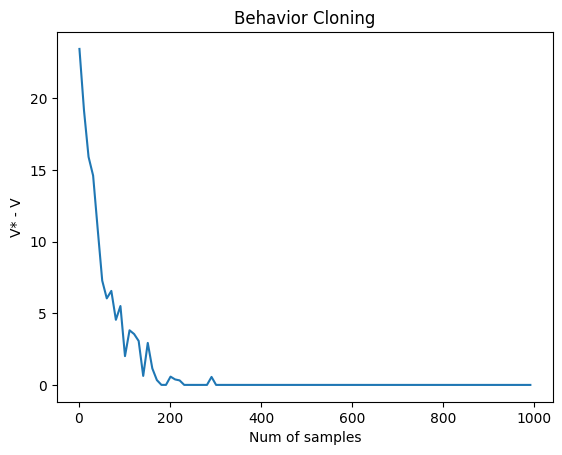

In [3]:
import matplotlib.pyplot as plt


# 最尤推定をしてBCをしてみましょう
# TODO: 多分経験期待値と同じになる気がします

Ns = np.arange(1, 1000, 10)
res = []

for N in Ns:
    data = np.random.choice(S*A, size=N, p=optimal_policy_visit_SA)
    BC_policy = np.zeros(S*A)
    for n in range(N):
        BC_policy[data[n]] += 1

    BC_policy = BC_policy.reshape(S, A) + 1e-4
    BC_policy /= BC_policy.sum(axis=1, keepdims=True)

    res.append(np.max(mdp.optimal_Q - compute_policy_Q(mdp, BC_policy)))


plt.plot(Ns, res)
plt.title("Behavior Cloning")
plt.ylabel("V* - V")
plt.xlabel("Num of samples")

## エントロピー最大化逆強化学習の実験

In [4]:
from typing import Optional, NamedTuple
import numpy as np

# エントロピーー最大化逆強化学習をします。

d = 5
S = 10  # 状態集合のサイズ
A = 3  # 行動集合のサイズ
S_set = np.arange(S)  # 状態集合
A_set = np.arange(A)  # 行動集合
gamma = 0.9  # 割引率

# 遷移確率行列を適当に作ります
P = np.random.rand(S*A, S)
P = P / np.sum(P, axis=-1, keepdims=True)  # 正規化して確率にします
P = P.reshape(S, A, S)
np.testing.assert_almost_equal(P.sum(axis=-1), 1)  # ちゃんと確率行列になっているか確認します

# 定義中の theta を適当に作り、報酬関数を作成します。実験のために0~1に正規化します。
phi = np.random.rand(S, A, d)
phi = phi / (phi ** 2).sum()
theta = np.random.rand(d)
_rew = phi @ theta
_rew_max = np.abs(_rew).max()
theta = theta / _rew_max
rew = phi @ theta
np.testing.assert_almost_equal(np.abs(rew).max(), 1.0)
assert rew.shape == (S, A)

# 初期状態分布を適当に作ります
mu = np.random.rand(S)
mu = mu / np.sum(mu)


class MDP(NamedTuple):
    S_set: np.array  # 状態空間
    A_set: np.array  # 行動空間
    gamma: float  # 割引率
    horizon: int  # ホライゾン
    d: int  # 特徴ベクトルの次元数
    phi: float  # 特徴ベクトル
    rew: float  # 報酬関数
    mu: np.array  # 初期状態分布
    P: float  # 遷移確率
    optimal_Q: Optional[np.ndarray] = None  # 最適Q値

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)


linear_MDP = MDP(S_set, A_set, gamma, horizon, d, phi, rew, mu, P)

In [5]:
@jax.jit
def compute_soft_greedy_policy(Q: np.ndarray):
    """正則化されたQ関数の貪欲方策を返します

    Args:
        Q (np.ndarray): (SxA)の行列

    Returns:
        greedy_policy (np.ndarray): (SxA)の行列
    """
    S, A = Q.shape
    greedy_policy = jax.nn.softmax(Q, axis=1)
    assert greedy_policy.shape == (S, A)
    return greedy_policy


@partial(jax.jit, static_argnames=("S", "A"))
def _compute_soft_optimal_Q(mdp: MDP, S: int, A: int):
    """MDPについて、ソフトベルマン最適作用素を複数回走らせて最適価値関数を動的計画法で計算します。
    Args:
        mdp (MDP)

    Returns:
        optimal_Q (np.ndarray): (SxA)の行列
    """

    def backup(optimal_Q):
        Q_max = optimal_Q.max(axis=1, keepdims=True)
        next_v = Q_max.reshape(-1) + jnp.log(jnp.exp(optimal_Q - Q_max).sum(axis=1) / A + 1e-6)
        next_v = mdp.P @ next_v
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    optimal_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, optimal_Q)

compute_soft_optimal_Q = lambda mdp: _compute_soft_optimal_Q(mdp, mdp.S, mdp.A)

In [20]:
# θの初期値
theta_t = np.random.rand(linear_MDP.d)
phi = linear_MDP.phi.reshape(-1, d)

M = 100
N = 100
T = 100000
lr = 0.1

optimal_Q = compute_optimal_Q(linear_MDP)
optimal_policy = compute_greedy_policy(optimal_Q)
Pi = compute_policy_matrix(optimal_policy)
PiP = Pi @ linear_MDP.P.reshape(S*A, S) 
optimal_policy_visit_SA = linear_MDP.mu @ np.linalg.inv(np.eye(S) - linear_MDP.gamma * PiP) @ Pi
optimal_policy_visit_SA = np.array((1 - gamma) * optimal_policy_visit_SA)
np.testing.assert_almost_equal(optimal_policy_visit_SA.sum(), 1.0, decimal=5)
optimal_policy_visit_SA = optimal_policy_visit_SA / optimal_policy_visit_SA.sum()
opt_data = np.random.choice(S*A, size=M, p=optimal_policy_visit_SA)
opt_phi = phi[opt_data].sum(axis=0) / M

res = []
theta_gap = []

for t in range(T):
    # エントロピー最大化逆強化学習
    theta_rew = linear_MDP.phi @ theta_t
    pseudo_linear_MDP = linear_MDP._replace(rew=theta_rew)
    soft_Q = compute_soft_optimal_Q(pseudo_linear_MDP)
    policy = compute_soft_greedy_policy(soft_Q)

    Pi = compute_policy_matrix(policy)
    PiP = Pi @ pseudo_linear_MDP.P.reshape(S*A, S) 
    policy_visit_SA = pseudo_linear_MDP.mu @ np.linalg.inv(np.eye(S) - pseudo_linear_MDP.gamma * PiP) @ Pi
    policy_visit_SA = np.array((1 - gamma) * policy_visit_SA)
    np.testing.assert_almost_equal(policy_visit_SA.sum(), 1.0, decimal=5)
    policy_visit_SA = policy_visit_SA / policy_visit_SA.sum()

    data = np.random.choice(S*A, size=N, p=policy_visit_SA)
    data_phi = phi[data].sum(axis=0) / N

    theta_t = theta_t - lr * (data_phi - opt_phi)

    # evaluation
    res.append((optimal_Q - compute_policy_Q(linear_MDP, policy)).max())
    theta_gap.append(np.abs(theta - theta_t).max())

Text(0.5, 1.0, 'Theta Gap')

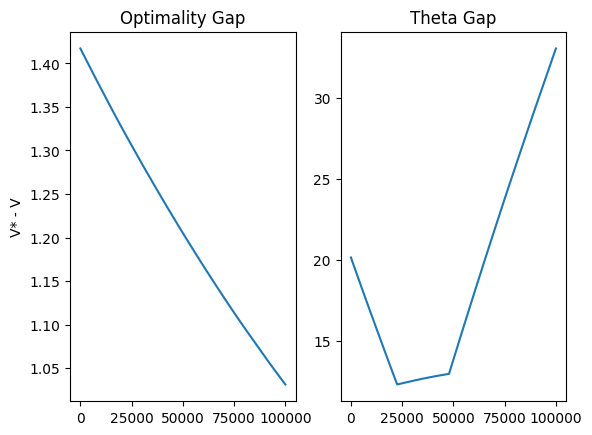

In [22]:
plt.subplot(1, 2, 1)
plt.plot(res)
plt.title("Optimality Gap")
plt.ylabel("V* - V")
plt.subplot(1, 2, 2)
plt.plot(theta_gap)
plt.title("Theta Gap")

## AggreVateの実験